11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of training samples: 60000
Number of test samples: 10000


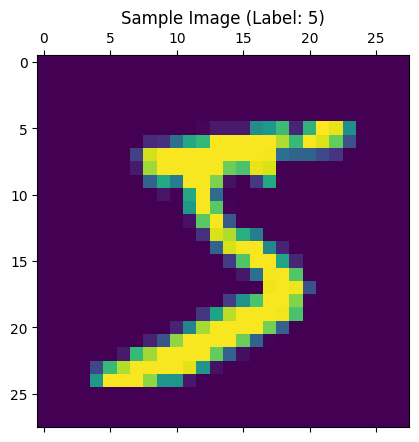

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7216 - loss: 1.0486 - val_accuracy: 0.9047 - val_loss: 0.3569
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8996 - loss: 0.3625 - val_accuracy: 0.9163 - val_loss: 0.2961
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9167 - loss: 0.2937 - val_accuracy: 0.9258 - val_loss: 0.2633
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9255 - loss: 0.2690 - val_accuracy: 0.9310 - val_loss: 0.2418
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9324 - loss: 0.2419 - val_accuracy: 0.9371 - val_loss: 0.2246
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9385 - loss: 0.2184 - val_accuracy: 0.9422 - val_loss: 0.2088
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9410 - loss: 0.2108 - val_accuracy: 0.9439 - val_loss: 0.1970
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9456 - loss: 0.1969 - 

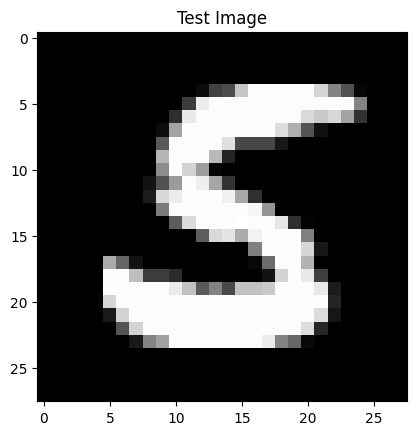

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Handwritten number in the image is: 5


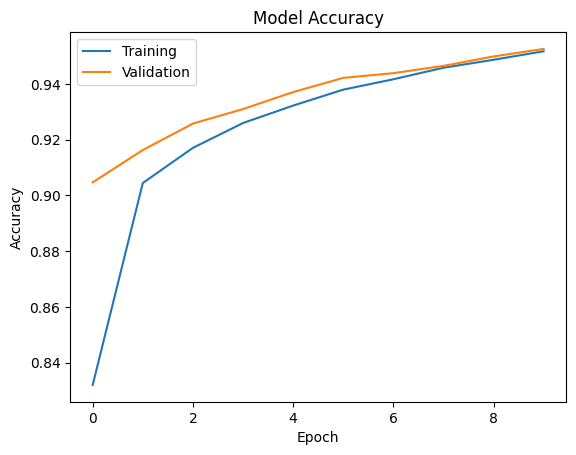

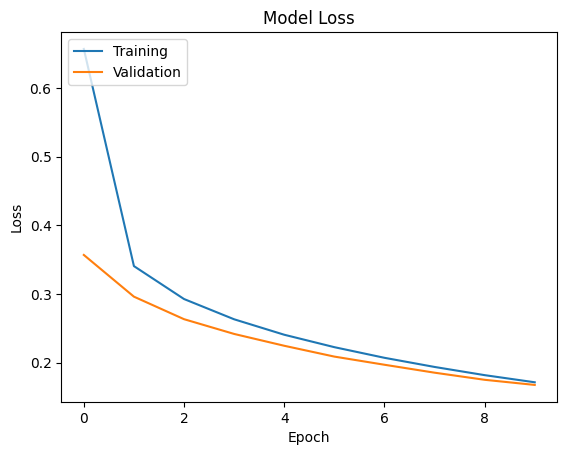

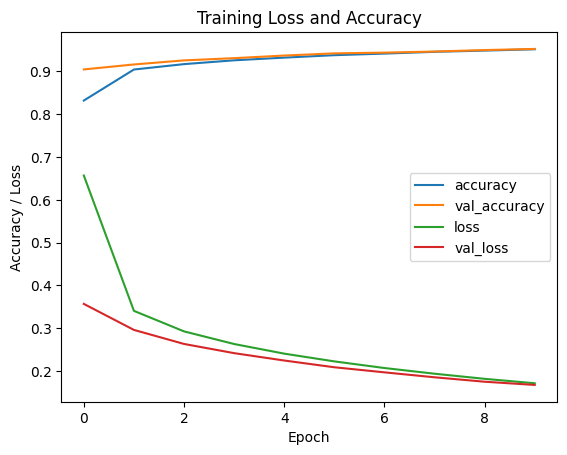

In [1]:
# -------------------------------
# Deep Learning Experiment 2
# Handwritten Digit Recognition using ANN on MNIST dataset
# -------------------------------

# Importing Libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Inline plotting
%matplotlib inline

# -------------------------------
# Load and prepare the MNIST dataset
# -------------------------------

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check dataset sizes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of training samples:", len(x_train))
print("Number of test samples:", len(x_test))

# Show a sample image
plt.matshow(x_train[0])
plt.title(f"Sample Image (Label: {y_train[0]})")
plt.show()

# Normalize images to range 0–1
x_train = x_train / 255.0
x_test = x_test / 255.0

# -------------------------------
# Create the model
# -------------------------------
# Flatten layer converts 28x28 → 784 (1D vector)
# Dense(128, relu) → hidden layer
# Dense(10, softmax) → output layer for 10 classes (digits 0–9)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Display model summary
model.summary()

# -------------------------------
# Compile the model
# -------------------------------
# Optimizer: SGD (Stochastic Gradient Descent)
# Loss: Sparse categorical cross-entropy (used for integer labels)
# Metric: Accuracy

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -------------------------------
# Train the model
# -------------------------------
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10
)

# -------------------------------
# Evaluate the model
# -------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nLoss = %.3f" % test_loss)
print("Accuracy = %.3f" % test_acc)

# -------------------------------
# Make a prediction on new data
# -------------------------------
n = random.randint(0, 9999)
plt.imshow(x_test[n], cmap='gray')
plt.title("Test Image")
plt.show()

predicted_value = model.predict(x_test)
print("Handwritten number in the image is: %d" % np.argmax(predicted_value[n]))

# -------------------------------
# Plot Accuracy and Loss graphs
# -------------------------------
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# Combined Accuracy + Loss graph (optional)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and Accuracy')
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plt.show()
